# Graph Analysis of CSD
### This notebook tests graph theoretic analysis on skeletons produced from persistence analysis on CSD profiles using the topology toolkit

#### Load the data

In [8]:
import numpy as np
import os
from os.path import isfile, join
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
sns.set()

if  not 'C:\\Program Files (x86)\\Graphviz2.38\\bin' in os.environ["PATH"]: 
    os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin' 

In [2]:
# csd_skeleton = np.genfromtxt('D:/Jones Lab/csd_real_skeleton.csv', delimiter = ',', skip_header=1)

csd_surface_df = pd.read_csv('D:/Jones_Lab/hnn_params/test_sweep_data/test_sweep-t_evprox_1_0_t_evdist_1_0.csv', sep=',')
csd_nodes_df = pd.read_csv('D:/Jones_Lab/tests/test_nodes.csv', sep=',')
csd_connectivity_df = pd.read_csv('D:/Jones_Lab/tests/test_arcs.csv', sep=',')
csd_connectivity_dense_df = pd.read_csv('D:/Jones_Lab/tests/test_arcs.csv', sep=',')


# surface_points = np.array(csd_surface_df[['Points:0','Points:1','Points:2']]) #Use if extracting points from paraview
surface_points = np.array(csd_surface_df) #Use if using original surface file

node_points = np.array(csd_nodes_df[['Points:0','Points:1','Points:2']])
node_connectivity = np.array(csd_connectivity_df[['upNodeId','downNodeId']])
node_connectivity_dense = np.array(csd_connectivity_dense_df[['upNodeId','downNodeId']])


In [4]:
%matplotlib inline

num_pairs = node_connectivity.shape[0]
fig = plt.figure()
ax = plt.axes(projection='3d')

for pair in range(num_pairs):
    pairID = node_connectivity[pair]
    pairID
    xdata, ydata, zdata = node_points[pairID, 0], node_points[pairID, 1], node_points[pairID, 2]

    ax.plot(xdata,ydata,zdata, 'k')

ax.plot_trisurf(surface_points[::100,0],surface_points[::100,1],surface_points[::100,2],cmap='viridis',edgecolor='none', alpha=0.2)

plt.show()


### Load Nodes into graph

In [5]:
G = nx.Graph()
G.add_edges_from(node_connectivity)

A = nx.Graph()
A.add_edges_from(node_connectivity_dense)
pos = graphviz_layout(A, prog='neato')

KeyboardInterrupt: 

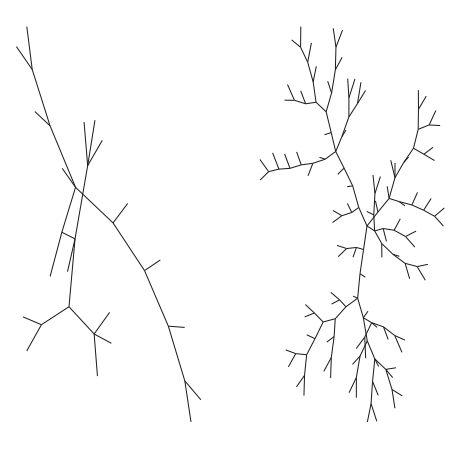

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(121)
nx.draw(G, font_weight='bold', node_size=0)

plt.subplot(122)
nx.draw(A,pos,node_size=0)


Load group of skeletons 

In [13]:
skeleton_dir = 'D:/Jones_Lab/hnn_params/test_sweep_data/'
onlyfiles = [f for f in listdir(skeleton_dir) if isfile(join(skeleton_dir, f))]
names = [f_new.strip('.csv') for f_new in onlyfiles]
names

['test_sweep-t_evprox_1_0_t_evdist_1_0',
 'test_sweep-t_evprox_1_0_t_evdist_1_1',
 'test_sweep-t_evprox_1_0_t_evdist_1_2',
 'test_sweep-t_evprox_1_1_t_evdist_1_0',
 'test_sweep-t_evprox_1_1_t_evdist_1_1',
 'test_sweep-t_evprox_1_1_t_evdist_1_2',
 'test_sweep-t_evprox_1_2_t_evdist_1_0',
 'test_sweep-t_evprox_1_2_t_evdist_1_1',
 'test_sweep-t_evprox_1_2_t_evdist_1_2']